## Import Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import altair as alt
import pywt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

### File Path and No. of Data Subcarriers

In [2]:
# NAME OF FILE AFTER CONVERTING TO REQUIRED FORMAT USING 'subcarrier.ipynb'
name = 'walk'
filepath = './subcarrier_removed/'+f'{name}'+'_data.csv'

#No. OF DATA SUBCARRIERS
SUBCARRIES_NUM = 52

### Read CSV File and Separate Amplitude and Phase Data

In [3]:
def read_csi_data_from_csv(path_to_csv):
    file = pd.read_csv(path_to_csv, header=None).values

    # CONVERT CSV TO DATAFRAME WITH FLOATING POINT VALUES
    data = pd.DataFrame(file).apply(pd.to_numeric, errors='coerce').values
    # CONVERT 'Nan' VALUES IN DATAFRAME TO 0.0
    data = np.nan_to_num(data)

    # data_len = data.shape[0]
    antenna_pair = 1
    # display(data_len)
    subcarries_num = SUBCARRIES_NUM
    amplitudes = data[:, :subcarries_num]
    amp_dat = pd.DataFrame(amplitudes)
    display(amp_dat)
    display(len(amp_dat.columns))
    phases = data[:, subcarries_num:subcarries_num*2]
    phase_dat = pd.DataFrame(phases)
    display(phase_dat)
    
    return amplitudes, phases

In [4]:
experiments_data = []
amplitudes, phases = read_csi_data_from_csv(filepath)
experiments_data.append([amplitudes, phases])
# display(experiments_data[0][0][0])

#EXPERIMENT_DATA[0][0] --> AMPLITUDES
#EXPERIMENT_DATA[0][0] --> PHASES

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,754.254599,760.531393,772.798163,853.211580,906.449116,920.354823,894.899436,740.073645,623.028892,473.932485,...,276.088754,353.793725,439.004556,549.331412,569.084352,575.235604,557.216296,522.817368,527.360408,10245.0
1,719.792331,744.662340,771.114129,847.030696,886.937427,902.358022,878.786095,735.272058,608.473500,458.661095,...,284.007042,366.521486,439.965908,541.629024,563.099458,561.794446,549.110189,511.962889,484.200372,10245.0
2,696.282988,762.409995,790.575740,859.982558,936.000000,922.198460,885.124285,813.801573,604.028145,437.833302,...,275.138147,367.164813,463.479234,565.207926,587.391692,580.331802,566.396504,519.954806,464.853740,10245.0
3,732.699120,736.696681,753.855424,821.650169,874.448398,879.573760,857.303330,706.244292,586.250800,447.698559,...,281.328989,352.841324,423.288318,523.699341,544.141526,552.764869,527.539572,495.694462,498.723370,10245.0
4,200.262328,76.922038,48.010416,64.140471,111.220502,66.030296,50.209561,13.416408,42.485292,58.694122,...,451.213918,478.235298,490.854357,661.372059,596.781367,446.542271,879.000569,955.641146,673.279288,10245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,611.493254,597.621954,574.783437,529.244745,446.767277,352.001420,253.337719,70.327804,137.116739,256.353272,...,686.894461,706.959688,709.661891,638.420708,571.969405,487.377677,380.753201,277.838082,246.357464,10245.0
11995,757.693870,778.298786,788.388229,739.692504,657.167406,561.356393,439.755614,216.270664,206.651881,321.697062,...,885.353037,905.967439,904.835897,798.429083,706.249956,600.430679,481.414582,354.053668,233.060078,10245.0
11996,548.745843,537.819672,523.634414,478.037655,421.293247,339.436297,252.857667,99.297533,145.602198,244.386988,...,661.254112,688.447529,690.046375,626.955341,565.446726,489.331176,381.536368,300.136636,281.455147,10245.0
11997,509.480127,521.584126,524.271876,484.109492,414.575687,333.685481,253.189652,100.124922,149.003356,249.819935,...,658.148919,693.882555,695.505572,632.210408,564.575947,482.943061,389.919222,303.041251,263.336287,10245.0


52

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,2.108033,1.979141,1.844652,1.593067,1.374266,1.200580,1.074660,0.868619,0.800153,0.758539,...,2.523448,2.694378,2.751357,2.701556,2.629203,2.509218,2.348580,2.165695,2.108289,0.0
1,-2.595217,-2.607622,-2.639658,-2.785862,-2.929161,-3.013801,-3.077825,-3.114388,-3.102139,-3.056460,...,1.563754,1.799231,1.935686,2.048481,2.048740,2.016134,1.945554,1.857950,1.931742,0.0
2,-1.208159,-1.538000,-1.896547,-2.338104,-2.746802,-3.090605,2.817341,2.212331,1.903018,1.632503,...,1.298488,1.359513,1.357744,0.842979,0.545967,0.206520,-0.138152,-0.497198,-0.820391,0.0
3,-0.804701,-0.844943,-0.892534,-1.031420,-1.143980,-1.216683,-1.244251,-1.231582,-1.184272,-1.120135,...,-1.953283,-1.673003,-1.492756,-1.310071,-1.278107,-1.282805,-1.335473,-1.394371,-1.373008,0.0
4,-1.390050,0.457834,2.193467,-2.111216,0.580521,-1.540503,0.799482,-0.463648,-1.107149,2.738938,...,-0.766592,2.256967,-1.232295,2.799281,-2.918562,-3.092305,-3.140455,-2.783434,-0.191279,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,1.764985,1.644488,1.518579,1.314819,1.109151,0.924454,0.746312,-0.520910,-1.746736,-2.062360,...,-1.335704,-1.394485,-1.469165,-1.674361,-1.800085,-1.995896,-2.242666,-2.592531,-3.003140,0.0
11995,-1.821537,-2.073527,-2.314925,-2.608361,-2.853051,-3.105957,2.909851,1.984795,1.087671,0.433059,...,-0.774217,-0.898814,-1.034926,-1.327944,-1.511292,-1.748266,-2.064175,-2.460235,-2.818485,0.0
11996,0.470982,0.351154,0.244979,0.012552,-0.210430,-0.412242,-0.664859,-1.898916,-2.863293,3.035002,...,-2.965256,-3.057245,3.129999,2.895067,2.724625,2.534885,2.241035,1.844062,1.513918,0.0
11997,1.086958,1.059973,1.032012,0.873149,0.718830,0.602133,0.440683,-0.693460,-1.564085,-1.892547,...,0.906022,0.898756,0.870903,0.771976,0.679997,0.536868,0.329050,0.016500,-0.133304,0.0


### Function to preprocess Phase data

In [5]:
# https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/sys031fp.pdf
# Based on https://github.com/ermongroup/Wifi_Activity_Recognition/.../phase_calibration.m
def calibrate_single_phase(phases):
    phases = np.array(phases)
    difference = 0

    calibrated_phase, calibrated_phase_final = np.zeros_like(phases), np.zeros_like(phases)   
    calibrated_phase[0] = phases[0]
    
    phases_len = phases.shape[0]
    
    for i in range(1, phases_len):
        temp = phases[i]- phases[i - 1]
        
        if abs(temp) > np.pi:
            difference = difference + 1*np.sign(temp)
            
        calibrated_phase[i] = phases[i] - difference * 2 * np.pi
        
    k = (calibrated_phase[-1] - calibrated_phase[0]) / (phases_len - 1)
    b = np.mean(calibrated_phase)
    
    for i in range(phases_len):
        calibrated_phase_final[i] = calibrated_phase[i] - k * i - b
        
    return calibrated_phase_final


def calibrate_phase(phases):
    calibated_phases = np.zeros_like(phases)
    
    for i in range(phases.shape[0]):
        calibated_phases[i] = calibrate_single_phase(np.unwrap(phases[i]))
    
    return calibated_phases

def calibrate_amplitude(amplitudes, rssi=1): # Basic statistical normalization
    amplitudes = np.array(amplitudes)    
    return ((amplitudes - np.min(amplitudes)) / (np.max(amplitudes) - np.min(amplitudes))) * rssi

### Functions for Preprocessing (Using Hampel & Denoising)

In [6]:
def hampel(vals_orig, k=3, t0=123, outliers_return=False):
    vals = pd.Series(vals_orig.copy())

    #HAMPEL FILTER
    L= 1.4826
    
    rolling_median=vals.rolling(k).median()
    difference=np.abs(rolling_median-vals)
    median_abs_deviation=difference.rolling(k).median()
    threshold= t0 *L * median_abs_deviation
    outlier_idx=difference>threshold
    vals[outlier_idx]=rolling_median
    
    if outliers_return:
        return vals, outlier_idx

    return vals

def denoise(vals, th=0.19):
    threshold = th # THRESHOLD OF FILTERING

    data = vals.copy()

    w = pywt.Wavelet('sym5')
    maxlev = pywt.dwt_max_level(data.shape[0], w.dec_len)
    
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'sym5', level=maxlev)
    
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))

    datarec = pywt.waverec(coeffs, 'sym5')
    
    return datarec

def filter_amplitude_all_subcarriers(amplitudes):
    data_len = amplitudes.shape[0]
    
    res = np.zeros_like(amplitudes)

    for i in range(amplitudes.shape[1]):
        res[:data_len, i] = denoise(hampel(amplitudes[:, i]))[:data_len]
        
    return res

def hampel_all_subcarriers(amplitudes, k=3, t0=123):
    data_len = amplitudes.shape[0]
    
    res = np.zeros_like(amplitudes)
    outliers = []

    for i in range(amplitudes.shape[1]):
        res[:data_len, i], out = hampel(amplitudes[:, i], k, t0, outliers_return=True)[:data_len]
        outliers.append(out)
        
    return res, outliers

def denoise_all_subcarriers(amplitudes, th=0.19):
    data_len = amplitudes.shape[0]
    
    res = np.zeros_like(amplitudes)
    
    for i in range(amplitudes.shape[1]):
        res[:data_len, i] = denoise(amplitudes[:, i], th)[:data_len]
        
    return res

## Plot of Amplitude Data All Subcarrier With and Without Filtering

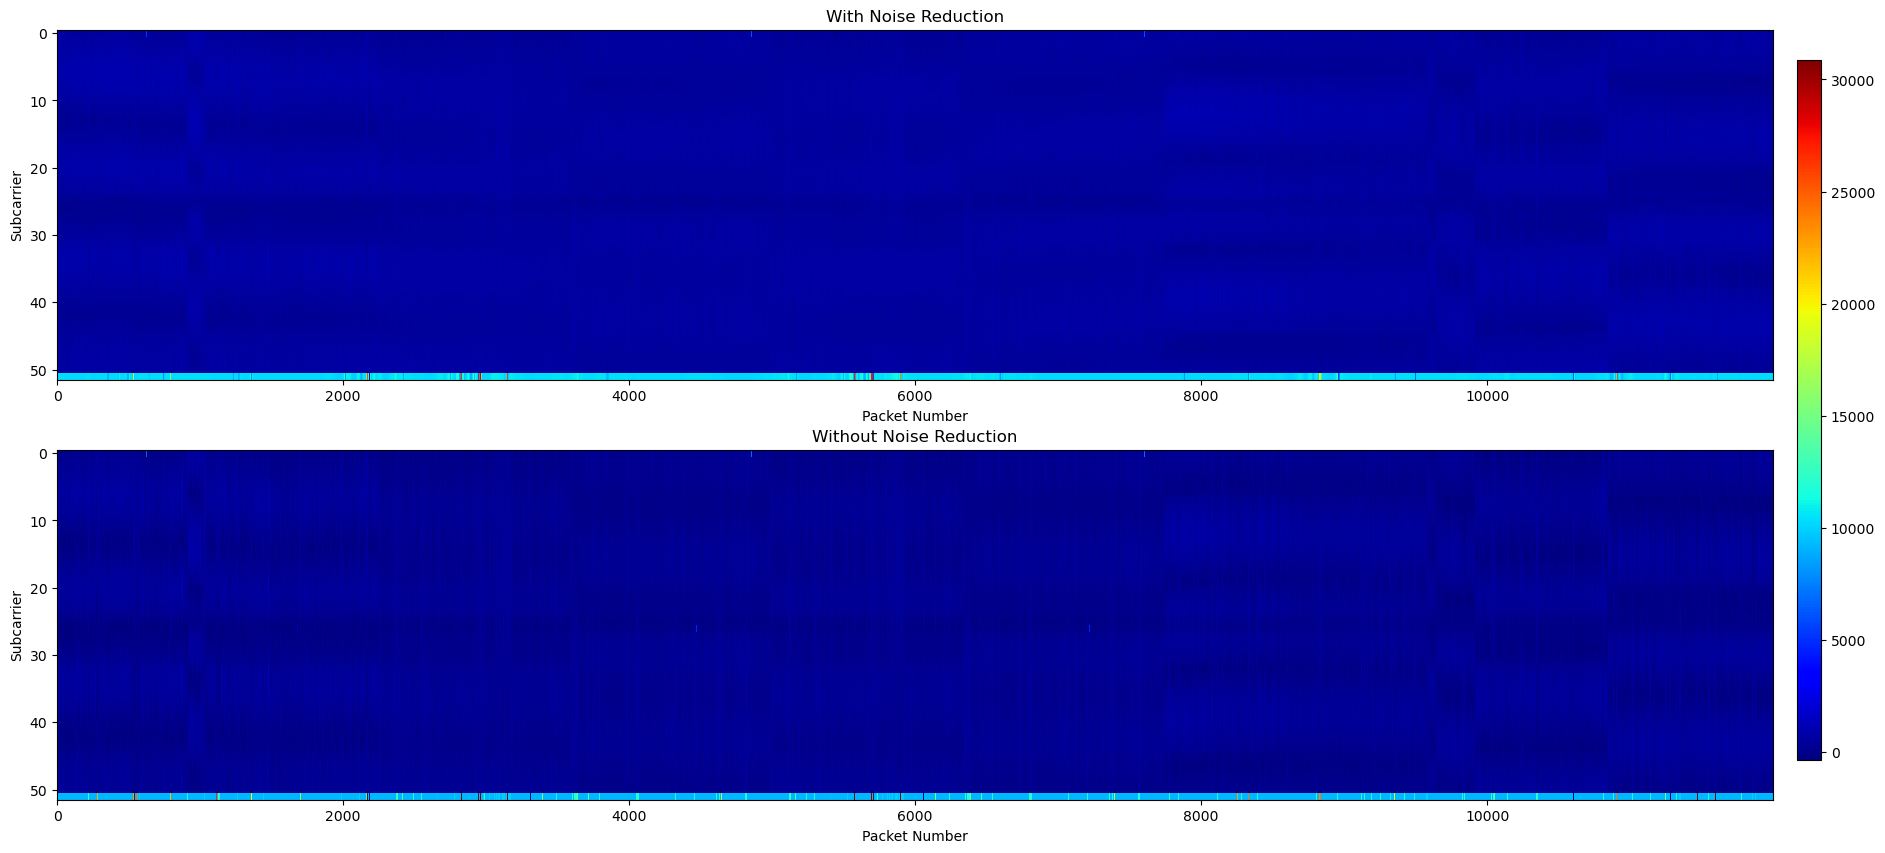

In [7]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

#PLOT AMPLITUDE AFTER NOISE REDUCTION
fig = plt.figure(figsize = (24,10))
ax = fig.add_subplot(211)
im = plt.imshow(filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax.set_title("With Noise Reduction")

#PLOT AMPLITUDE WITHOUT NOISE REDUCTION
ax1 = fig.add_subplot(212)
im1 = plt.imshow((experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Without Noise Reduction")

ax.set_ylabel('Subcarrier')
ax.set_xlabel('Packet Number')
ax1.set_ylabel('Subcarrier')
ax1.set_xlabel('Packet Number')

fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

## Amplitude Plot for Single Subcarrier with and without filtering

### Without Filtering

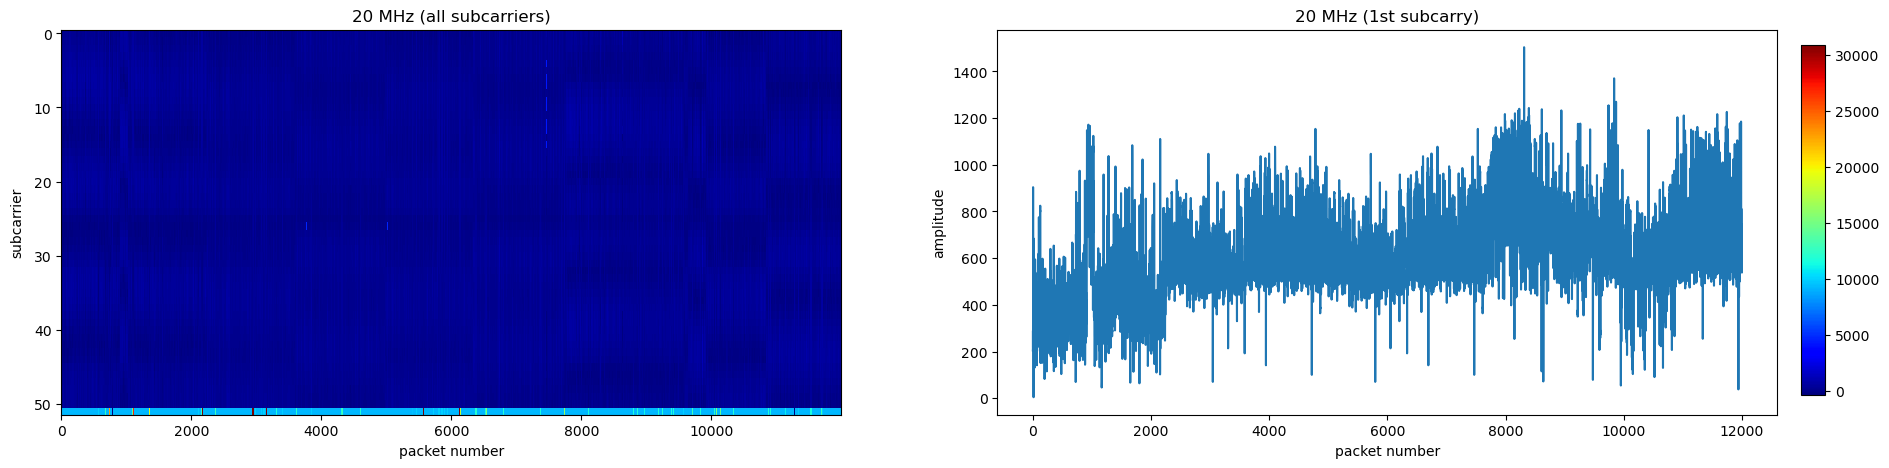

In [8]:
fig = plt.figure(figsize = (24,5))
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(121)
plt.imshow((experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("20 MHz (all subcarriers)")

ax3 = fig.add_subplot(122)
plt.plot((experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 40])
ax3.set_title("20 MHz (1st subcarry)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax1.set_xlabel('packet number')
ax3.set_ylabel('amplitude')
ax3.set_xlabel('packet number')

fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

### With Filtering

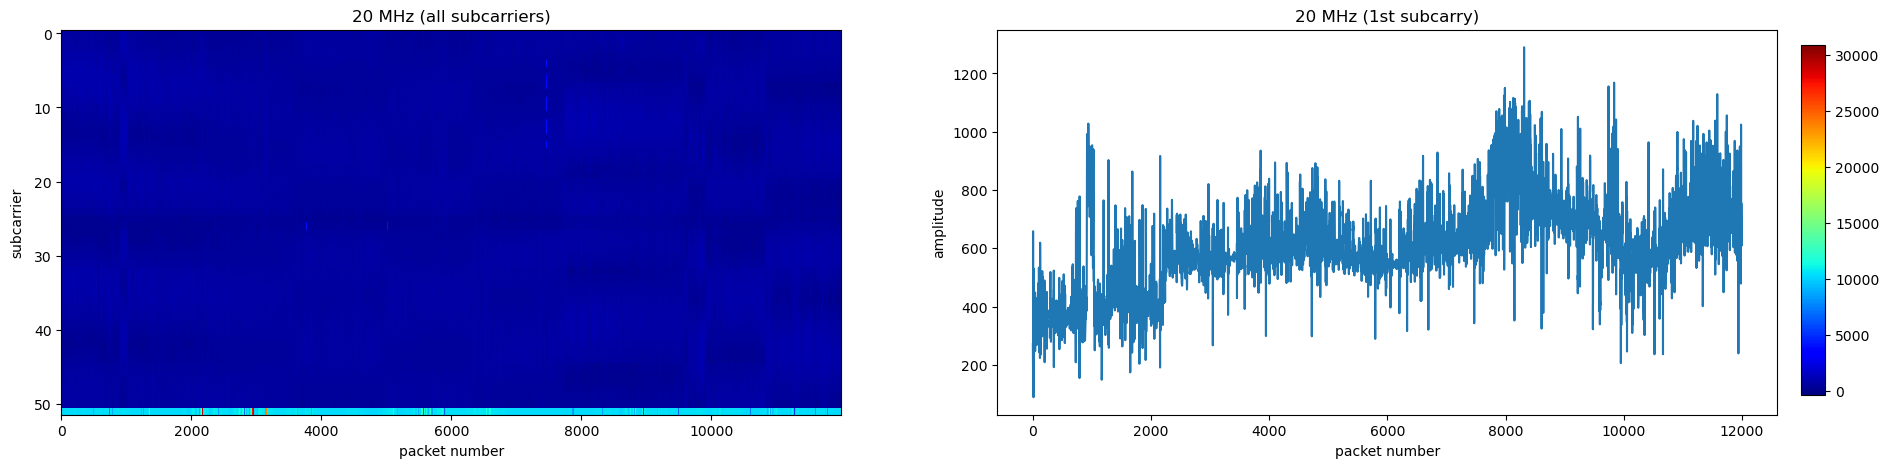

In [9]:
fig = plt.figure(figsize = (24, 5))
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(121)
plt.imshow(filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("20 MHz (all subcarriers)")

ax3 = fig.add_subplot(122)
plt.plot(filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 40])
ax3.set_title("20 MHz (1st subcarry)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax1.set_xlabel('packet number')
ax3.set_ylabel('amplitude')
ax3.set_xlabel('packet number')


fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

## Preprocessing Visualization

### 1. Phase Sanitization

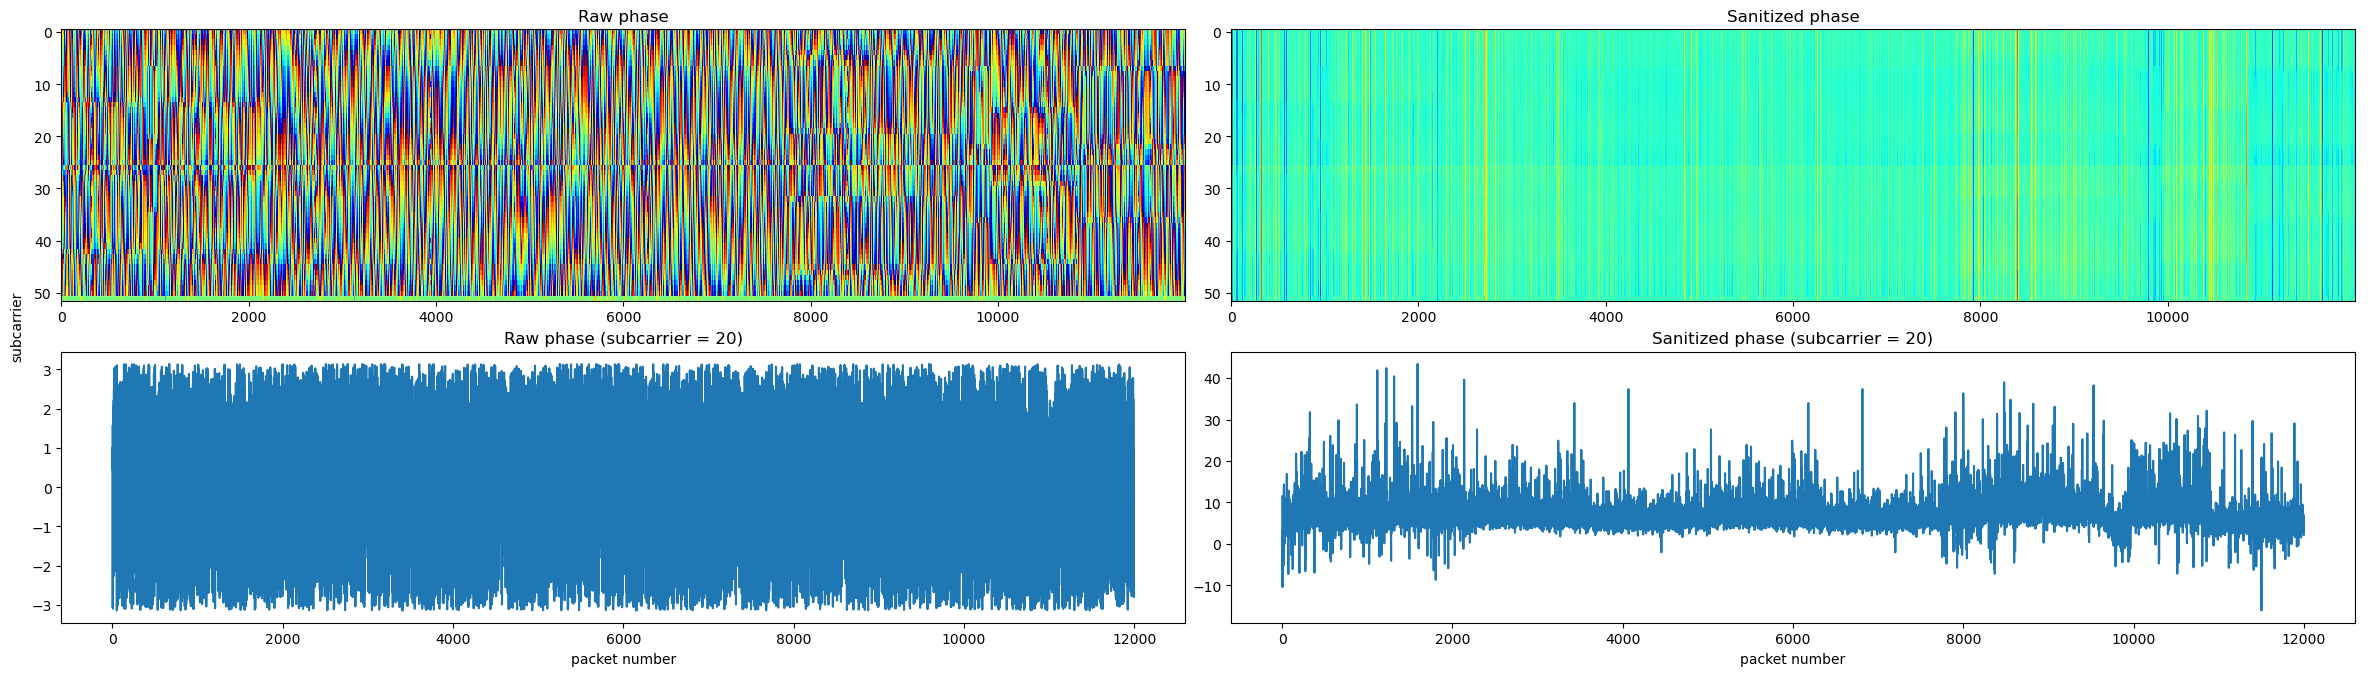

In [10]:
fig = plt.figure(figsize = (24, 7))
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
im = plt.imshow((experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Raw phase")

ax2 = fig.add_subplot(222)
im = plt.imshow(calibrate_phase(experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax2.set_title("Sanitized phase")

ax3 = fig.add_subplot(223)
plt.plot((experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 40])
ax3.set_title("Raw phase (subcarrier = 20)")

ax4 = fig.add_subplot(224)
plt.plot(calibrate_phase(experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 40])
ax4.set_title("Sanitized phase (subcarrier = 20)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax3.set_xlabel('packet number')
ax4.set_xlabel('packet number')

fig.tight_layout(pad=0.5)

plt.show()

### 2. Hampler Identifier Identification

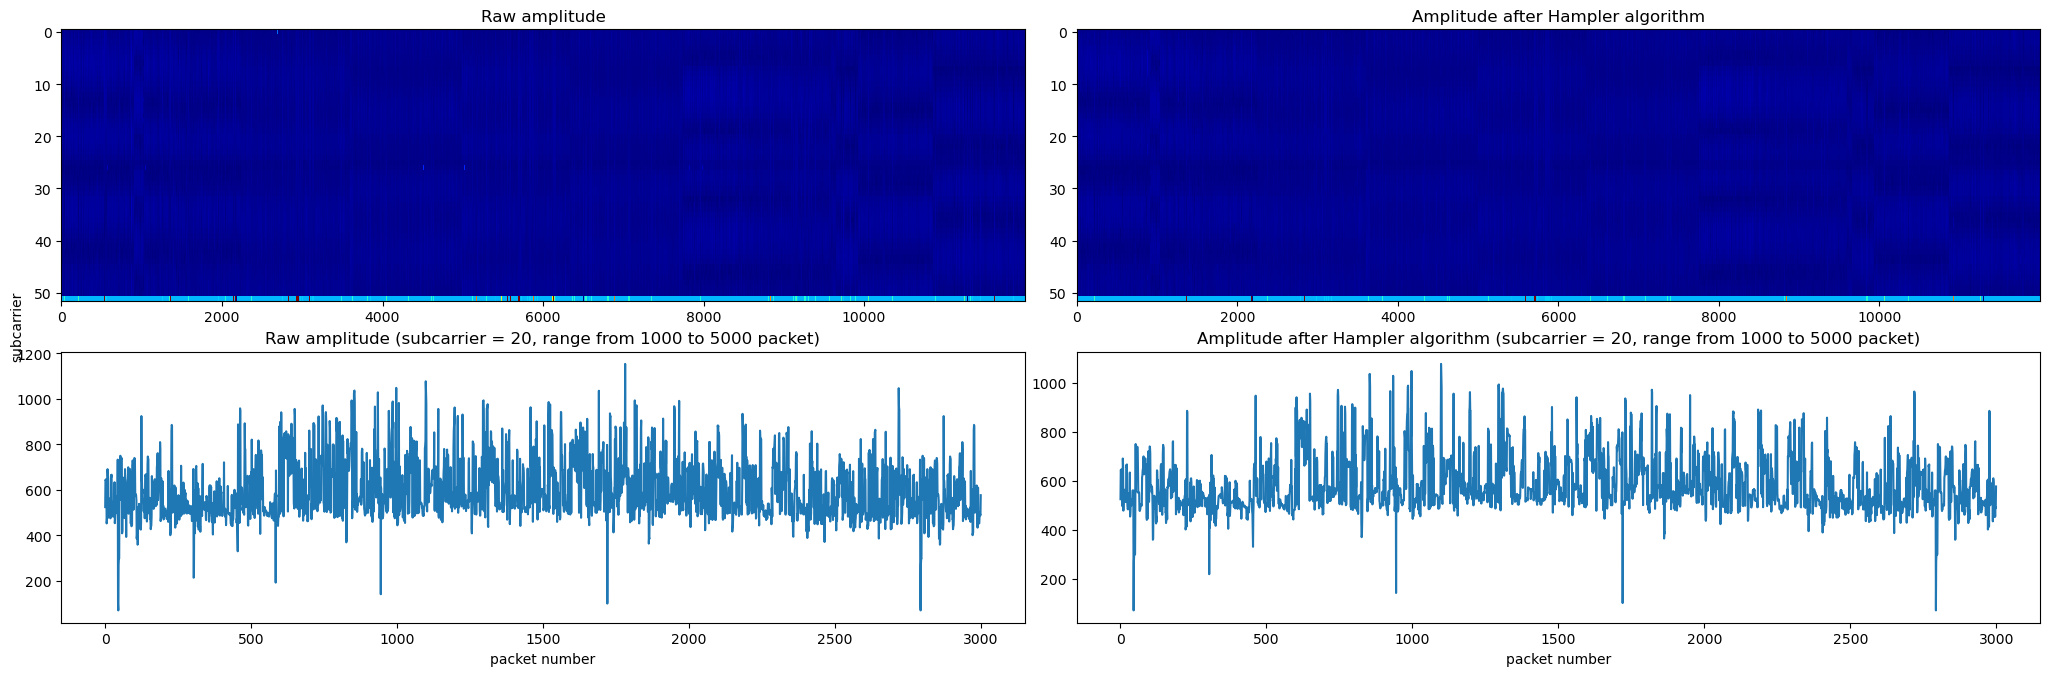

In [11]:
fig = plt.figure(figsize = (21, 7))
ax = fig.add_subplot(111)

amplitude = experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]
h_amplitude, outliers = hampel_all_subcarriers(amplitude, k=5, t0=2)

ax1 = fig.add_subplot(221)
im = plt.imshow((amplitude).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Raw amplitude")

ax2 = fig.add_subplot(222)
im = plt.imshow(h_amplitude.T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax2.set_title("Amplitude after Hampler algorithm")

# PLOT FOR 1000 TO 5000 PACKETS, 20TH SUBCARRIER
ax3 = fig.add_subplot(223)
plt.plot((amplitude)[3000:6000, 40])
ax3.set_title("Raw amplitude (subcarrier = 20, range from 1000 to 5000 packet)")

ax4 = fig.add_subplot(224)
plt.plot(h_amplitude[3000:6000, 40])
ax4.set_title("Amplitude after Hampler algorithm (subcarrier = 20, range from 1000 to 5000 packet)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax3.set_xlabel('packet number')
ax4.set_xlabel('packet number')

fig.tight_layout(pad=0.5)
plt.show()

In [12]:
# NO. OF OUTLIERS
(outliers[20].to_numpy().sum())

2307

### 3. Denoising

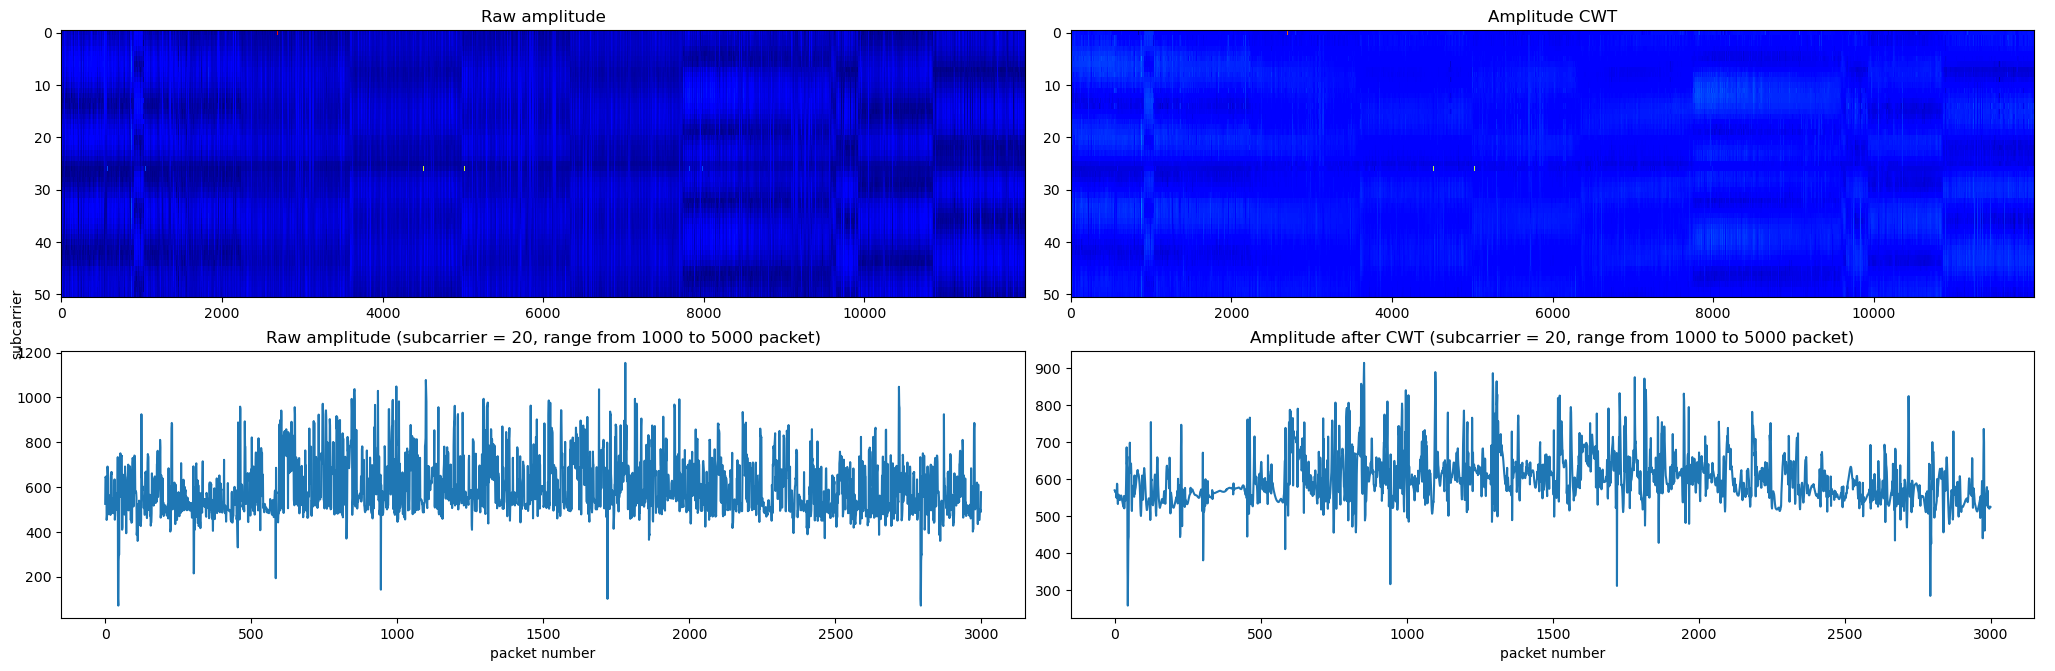

In [13]:
# TAKING AMPLITUDE FOR 52 SUBCARRIERS MANUALLY
dataset_amp = experiments_data[0][0][:, 0:51]
dataset_amp.shape

fig = plt.figure(figsize = (21, 7))
ax = fig.add_subplot(111)

amplitude = dataset_amp[:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]
denoise_amplitude = denoise_all_subcarriers(amplitude, th=0.2)

ax1 = fig.add_subplot(221)
im = plt.imshow((amplitude).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Raw amplitude")

ax2 = fig.add_subplot(222)
im = plt.imshow(denoise_amplitude.T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax2.set_title("Amplitude CWT")

# PLOT FOR 1000 TO 5000 PACKETS, 20TH SUBCARRIER

ax3 = fig.add_subplot(223)
plt.plot((amplitude)[3000:6000, 40])
ax3.set_title("Raw amplitude (subcarrier = 20, range from 1000 to 5000 packet)")

ax4 = fig.add_subplot(224)
plt.plot(denoise_amplitude[3000:6000, 40])
ax4.set_title("Amplitude after CWT (subcarrier = 20, range from 1000 to 5000 packet)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax3.set_xlabel('packet number')
ax4.set_xlabel('packet number')

fig.tight_layout(pad=0.7)
plt.show()

## Amplitude Preprocessing

In [14]:
result1 = filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])

df_result1 = pd.DataFrame(result1)

display(df_result1)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,675.008014,718.116383,737.612524,808.628025,866.921824,862.789952,845.795551,722.676960,566.470578,390.764491,...,279.976583,369.121773,443.666282,580.745096,596.126889,569.043046,567.542417,517.563421,477.825627,10306.204794
1,673.819581,749.877418,776.605409,852.061294,871.572971,902.676824,846.618437,727.328915,603.914495,404.198951,...,278.948278,364.016939,435.038300,571.233712,592.947542,572.596226,561.322069,507.579009,485.086408,10306.356710
2,672.688152,799.918586,837.602676,923.245794,874.938533,988.011867,859.536119,741.489448,658.950655,425.123872,...,277.677904,343.473239,415.917152,544.338255,582.232518,572.115718,542.436839,485.682357,493.879672,10306.511645
3,671.747652,784.807241,828.378543,916.215178,864.564396,988.877309,853.423183,744.188932,678.241518,458.213395,...,280.897890,350.903224,425.178414,549.733813,579.159240,575.042999,549.041014,493.997993,506.733914,10306.670432
4,670.990378,353.670138,313.198507,311.974042,838.422465,315.010425,822.911218,731.707271,221.441754,503.728989,...,315.868073,394.587763,467.416666,595.777685,586.560236,549.036418,689.806587,729.973158,524.309636,10306.833177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,641.340864,644.266551,600.979378,558.860458,496.174780,393.944750,302.645535,127.208943,174.689297,292.701061,...,792.852005,846.561115,853.657139,780.666908,680.727329,573.225508,440.236210,354.177574,316.076452,10316.205709
11995,642.059912,657.408549,658.270834,619.199458,496.707981,420.379923,302.580001,127.113089,175.155536,292.872636,...,808.990442,847.535107,850.500830,772.538068,670.974737,568.914027,438.907161,353.033514,318.523376,10315.918916
11996,642.837647,619.948864,602.114545,556.224999,496.499768,407.615548,302.489953,127.025647,175.638413,293.315745,...,744.676753,774.866149,775.882362,718.948831,626.566894,547.092737,438.415500,350.327610,321.871721,10315.402664
11997,643.556060,619.610676,600.050927,550.863235,496.301556,404.322250,302.406505,126.937108,176.107781,293.734059,...,753.464870,784.302617,787.807837,726.490207,635.711760,553.722263,438.471998,348.456220,323.995386,10315.139569


## Phase Preprocessing

In [15]:
result = calibrate_phase(experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])

df_result = pd.DataFrame(result)

display(df_result)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.232906,0.145348,0.052193,-0.158058,-0.335525,-0.467877,-0.552463,-0.717170,-0.744302,-0.744582,...,2.384348,2.596612,2.694925,2.686458,2.655439,2.576787,2.457484,2.315933,2.299861,0.232906
1,-2.078814,-2.142105,-2.225029,-2.422119,-2.616304,-2.751831,-2.866742,-2.954192,-2.992829,-2.998036,...,-0.057080,0.127510,0.213078,0.274987,0.224359,0.140867,0.019400,-0.119090,-0.096184,-2.078814
2,3.168879,2.938549,2.679512,2.337465,2.028278,1.783984,1.508256,1.002756,0.792953,0.621948,...,3.571773,3.732309,3.830050,3.414795,3.217294,2.977357,2.732196,2.472660,2.248977,3.168879
3,-2.736806,-2.916027,-3.102596,-3.380461,-3.631998,-3.843679,-4.010225,-4.136535,-4.228203,-4.303044,...,-3.439286,-3.297984,-3.256715,-3.213008,-3.320023,-3.463699,-3.655345,-3.853221,-3.970836,-2.736806
4,-3.884083,-2.186656,-0.601478,1.226569,3.767851,1.496371,3.685900,2.272315,1.478358,-1.109196,...,-9.579760,-6.706657,-4.063189,-6.465254,-6.050367,-6.374566,-6.573172,-6.366606,-3.924906,-3.884083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,5.883780,5.921091,5.952989,5.907036,5.859175,5.832286,5.811951,4.702536,3.634517,3.476701,...,3.127810,3.226837,3.309965,3.262575,3.294659,3.256655,3.167692,2.975634,2.722833,5.883780
11995,7.215388,7.174081,7.143365,7.060613,7.026606,6.984383,6.927688,6.213316,5.526874,5.082946,...,4.545024,4.631110,4.705681,4.623346,4.650681,4.624389,4.519164,4.333787,4.186220,7.215388
11996,6.169071,6.304877,6.454336,6.477543,6.510196,6.564019,6.567036,5.588613,4.879871,4.750615,...,7.186291,7.349936,7.509629,7.530331,7.615524,7.681418,7.643203,7.501864,7.427355,6.169071
11997,4.128969,4.246497,4.363048,4.348697,4.338891,4.366707,4.349770,3.360139,2.634027,2.450077,...,3.734377,3.871624,3.988284,4.033869,4.086403,4.087787,4.024481,3.856444,3.851152,4.128969


# Combined Preprocessed Data

In [16]:
df_row_concat = pd.concat([df_result1, df_result], axis=1, ignore_index=True)

display(df_row_concat)

save_path = './processed/'+f'{name}'+'_data.csv'

df_row_concat.to_csv(save_path, index=False, header=False)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,675.008014,718.116383,737.612524,808.628025,866.921824,862.789952,845.795551,722.676960,566.470578,390.764491,...,2.384348,2.596612,2.694925,2.686458,2.655439,2.576787,2.457484,2.315933,2.299861,0.232906
1,673.819581,749.877418,776.605409,852.061294,871.572971,902.676824,846.618437,727.328915,603.914495,404.198951,...,-0.057080,0.127510,0.213078,0.274987,0.224359,0.140867,0.019400,-0.119090,-0.096184,-2.078814
2,672.688152,799.918586,837.602676,923.245794,874.938533,988.011867,859.536119,741.489448,658.950655,425.123872,...,3.571773,3.732309,3.830050,3.414795,3.217294,2.977357,2.732196,2.472660,2.248977,3.168879
3,671.747652,784.807241,828.378543,916.215178,864.564396,988.877309,853.423183,744.188932,678.241518,458.213395,...,-3.439286,-3.297984,-3.256715,-3.213008,-3.320023,-3.463699,-3.655345,-3.853221,-3.970836,-2.736806
4,670.990378,353.670138,313.198507,311.974042,838.422465,315.010425,822.911218,731.707271,221.441754,503.728989,...,-9.579760,-6.706657,-4.063189,-6.465254,-6.050367,-6.374566,-6.573172,-6.366606,-3.924906,-3.884083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,641.340864,644.266551,600.979378,558.860458,496.174780,393.944750,302.645535,127.208943,174.689297,292.701061,...,3.127810,3.226837,3.309965,3.262575,3.294659,3.256655,3.167692,2.975634,2.722833,5.883780
11995,642.059912,657.408549,658.270834,619.199458,496.707981,420.379923,302.580001,127.113089,175.155536,292.872636,...,4.545024,4.631110,4.705681,4.623346,4.650681,4.624389,4.519164,4.333787,4.186220,7.215388
11996,642.837647,619.948864,602.114545,556.224999,496.499768,407.615548,302.489953,127.025647,175.638413,293.315745,...,7.186291,7.349936,7.509629,7.530331,7.615524,7.681418,7.643203,7.501864,7.427355,6.169071
11997,643.556060,619.610676,600.050927,550.863235,496.301556,404.322250,302.406505,126.937108,176.107781,293.734059,...,3.734377,3.871624,3.988284,4.033869,4.086403,4.087787,4.024481,3.856444,3.851152,4.128969


In [17]:
df_row_concat = pd.concat([df_result1, df_result], axis=1, ignore_index=True)

display(df_row_concat)

save_path = './processed/'+f'{name}'+'_data.csv'

df_row_concat.to_csv(save_path, index=False, header=False)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,675.008014,718.116383,737.612524,808.628025,866.921824,862.789952,845.795551,722.676960,566.470578,390.764491,...,2.384348,2.596612,2.694925,2.686458,2.655439,2.576787,2.457484,2.315933,2.299861,0.232906
1,673.819581,749.877418,776.605409,852.061294,871.572971,902.676824,846.618437,727.328915,603.914495,404.198951,...,-0.057080,0.127510,0.213078,0.274987,0.224359,0.140867,0.019400,-0.119090,-0.096184,-2.078814
2,672.688152,799.918586,837.602676,923.245794,874.938533,988.011867,859.536119,741.489448,658.950655,425.123872,...,3.571773,3.732309,3.830050,3.414795,3.217294,2.977357,2.732196,2.472660,2.248977,3.168879
3,671.747652,784.807241,828.378543,916.215178,864.564396,988.877309,853.423183,744.188932,678.241518,458.213395,...,-3.439286,-3.297984,-3.256715,-3.213008,-3.320023,-3.463699,-3.655345,-3.853221,-3.970836,-2.736806
4,670.990378,353.670138,313.198507,311.974042,838.422465,315.010425,822.911218,731.707271,221.441754,503.728989,...,-9.579760,-6.706657,-4.063189,-6.465254,-6.050367,-6.374566,-6.573172,-6.366606,-3.924906,-3.884083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,641.340864,644.266551,600.979378,558.860458,496.174780,393.944750,302.645535,127.208943,174.689297,292.701061,...,3.127810,3.226837,3.309965,3.262575,3.294659,3.256655,3.167692,2.975634,2.722833,5.883780
11995,642.059912,657.408549,658.270834,619.199458,496.707981,420.379923,302.580001,127.113089,175.155536,292.872636,...,4.545024,4.631110,4.705681,4.623346,4.650681,4.624389,4.519164,4.333787,4.186220,7.215388
11996,642.837647,619.948864,602.114545,556.224999,496.499768,407.615548,302.489953,127.025647,175.638413,293.315745,...,7.186291,7.349936,7.509629,7.530331,7.615524,7.681418,7.643203,7.501864,7.427355,6.169071
11997,643.556060,619.610676,600.050927,550.863235,496.301556,404.322250,302.406505,126.937108,176.107781,293.734059,...,3.734377,3.871624,3.988284,4.033869,4.086403,4.087787,4.024481,3.856444,3.851152,4.128969
